Import related libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Collection

Data Set Information: Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin. 
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

In [2]:
# MARK: - Replace the url to the data path in your computer 
#
# url = r'/Users/liyiran/Downloads/Raisin_Dataset 2/Raisin_Dataset.xlsx' # 1098339, macOS
url = r'C:\Users\WendellWang\ML\3320-Final\Raisin_Dataset.xlsx' # 1098648, Windows PC
#
# Read data from the url and Convert it to a pandas dataframe:
dataset = pd.read_excel(url)
#
# Use head() function to preview the first 5 rows in Jupyter Notebook: 
dataset.head() 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


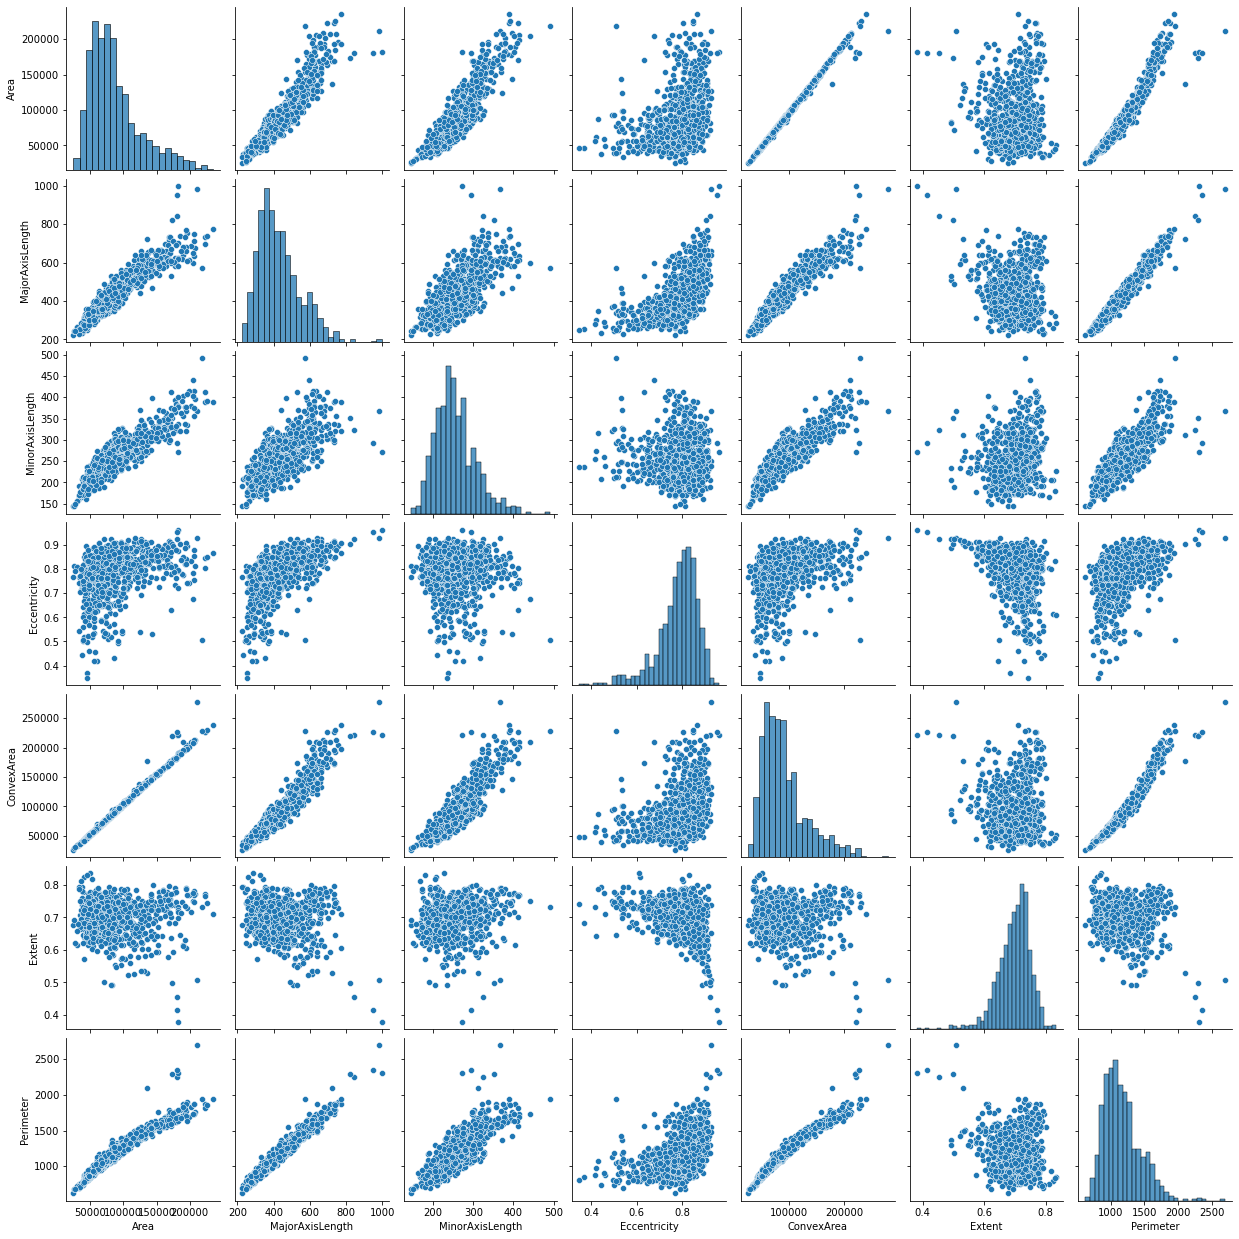

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Show the relationship between all features
sns.pairplot(dataset.iloc[:, :-1])

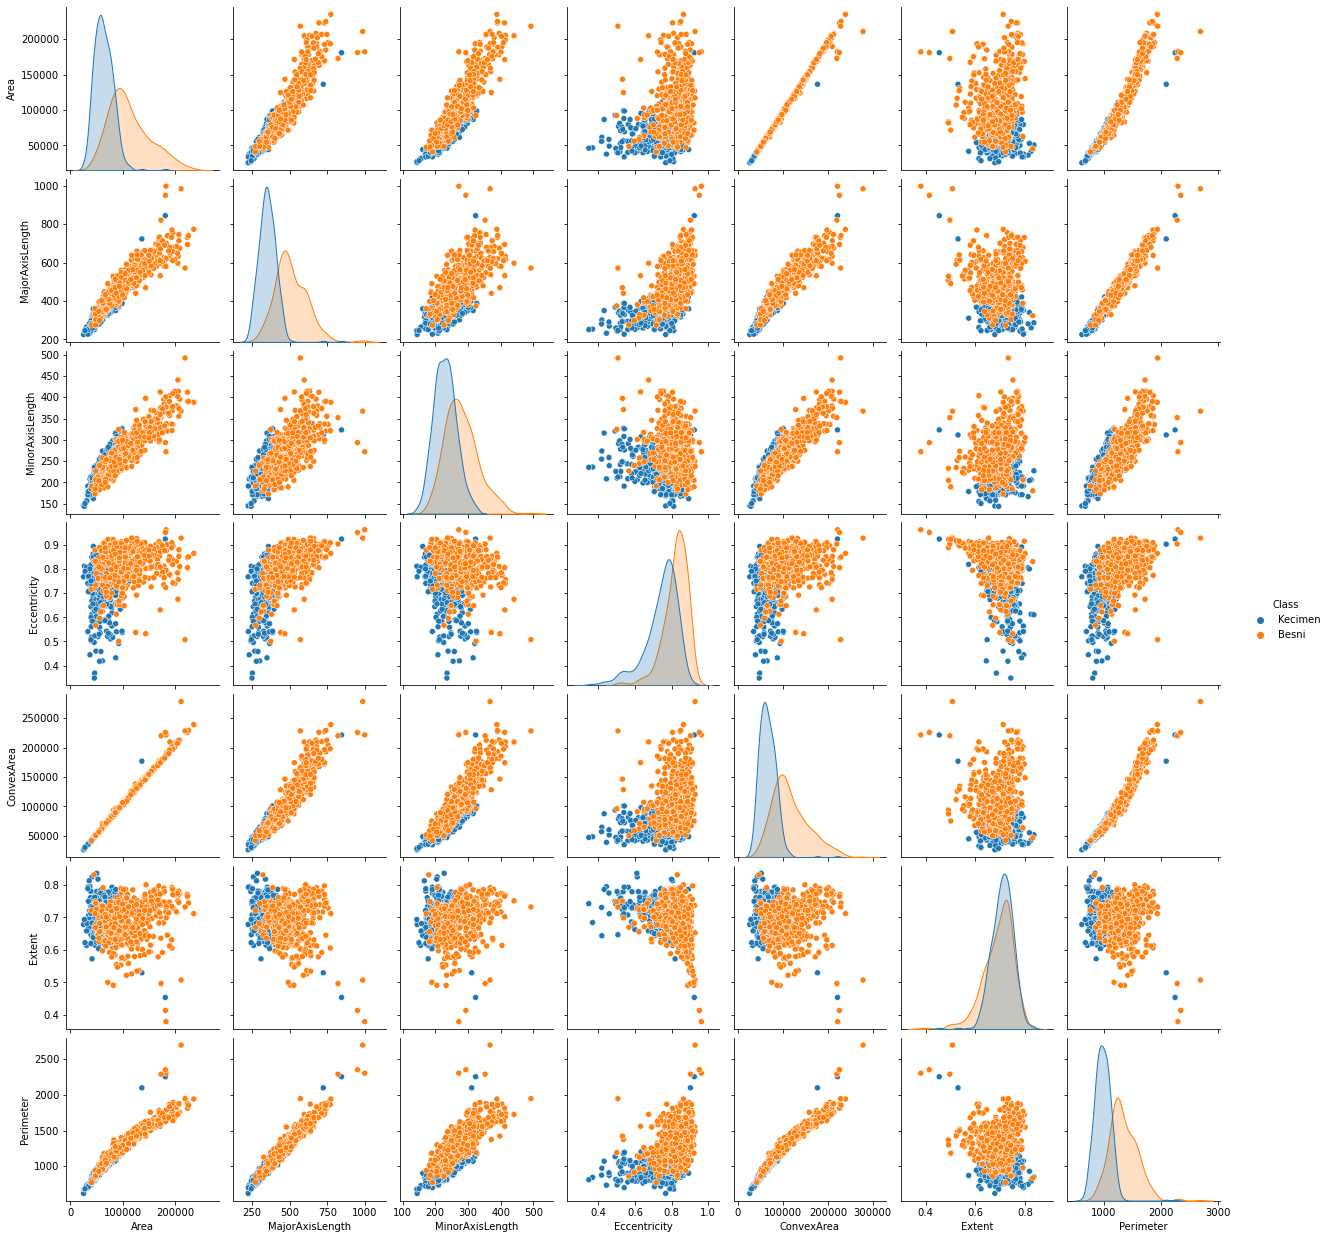

In [4]:
# Show the relationship between all features with class labels
sns.pairplot(dataset, hue="Class")

According to the above icons, we can find that there is a clear linear correlation between ConvexArea and Area. And, again, there is a clear correlation between them and Perimeter. Therefore, to ensure that our model can be more accurate, we may need to selectively remove a few of them. Of course, these depend on our subsequent model training, which we currently do not do for the time being.

## Data Preprocessing

* Eliminates empty and invalid data
* Remap String Class data to Int data

In [5]:
# Eliminates empty and invalid data
for col in dataset.columns:
    # Replace empty data with `np.nan`
    dataset[col].replace('', np.nan, inplace=True)
    # Drop rows containing empty cells from a pandas DataFrame 
    dataset.dropna(subset=[col], inplace=True)

# Remap String Class data to Int data
class_map = {'Kecimen': 0, 'Besni': 1}
dataset['Class'] = dataset['Class'].map(class_map)
# preview the first rows of the dataset
dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


Split datasets into Training Set and Testing Set, and their ratio should be 8 : 2

In [6]:
# Set the seed to make sure every split is similar
myseed = 42
# Assign values to the X and y variables:
X = dataset.iloc[:, :-1].values # Not include the last column (aka. the Label)
y = dataset.iloc[:, -1].values 
#
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=myseed) 

Standardize features by removing mean and scaling to unit variance

In [7]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

## Model Selection

### KNN (k-nearest neighbors algorithm)

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically

In [8]:
# This is just a code example of KNN
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [9]:
# This function is used to calculate the accuracy of between the test value and predict value
# 
# - Parameters:
#    test: Test Value
#    predict: Predict Value
# - Return: the accuracy of between the test and predict
def calModelAccuracy(test, predict):
    cfm = confusion_matrix(test, predict)
    accuracy = (cfm[0,0] + cfm[1,1])/(cfm[0,1] + cfm[1,0] + cfm[0,0] + cfm[1,1])
    return accuracy

In [10]:
print(calModelAccuracy(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        94
           1       0.82      0.84      0.83        86

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



From the result above, we could find that the KNN algorithm is really good for this problem. And the next thing is to fine-tune the model such that it could achieve the best performance.

### Parameter Tuning

As we mentioned easier, there are some parameters that may have a strong linear correlation, which we may need to remove them from our model parameters. And here it is...

In [11]:
# The most simple or stupid method is to list all possible paramter pair
# paramters indices that should be removed
# Area: 0
# ConvexArea: 4
# Permiter: 6

possible_paramter_pairs = []

from itertools import combinations
paramters_to_be_removed = [0,4,6]

# Get all combinations of the parameters_to_be_removed
for i in range(len(paramters_to_be_removed)):
    cbs = combinations(paramters_to_be_removed, i+1)
    for cb in cbs:
        possible_paramter_pairs.append(list(cb))

# Remove elements from dataset.columns indices
for pIndex in range(len(possible_paramter_pairs)):
    tmp = list(range(len(dataset.columns)-1))
    tmp = [i for j, i in enumerate(tmp) if j not in possible_paramter_pairs[pIndex]]
    possible_paramter_pairs[pIndex] = tmp

Find the most accurate paramters

In [12]:
for pair, i in enumerate(possible_paramter_pairs):
    print(pair, i)

0 [1, 2, 3, 4, 5, 6]
1 [0, 1, 2, 3, 5, 6]
2 [0, 1, 2, 3, 4, 5]
3 [1, 2, 3, 5, 6]
4 [1, 2, 3, 4, 5]
5 [0, 1, 2, 3, 5]
6 [1, 2, 3, 5]


In [13]:
def trainKNNModelAndPredict(indices, n=5):
    # Assign values to the X and y variables:
    fX = dataset.iloc[:, indices].values
    fy = dataset.iloc[:, -1].values 
    #
    # Split dataset into random train and test subsets:
    fX_train, fX_test, fy_train, fy_test = train_test_split(fX, fy, test_size=0.20, random_state=myseed) 
    clf = KNeighborsClassifier(n_neighbors=n+1)
    clf.fit(fX_train, fy_train)
    y_predict = clf.predict(fX_test)
    return y_predict, fy_test

In [14]:
accuracyList = [] # store accuracy value and indices
for pair in possible_paramter_pairs:
    y_predict, y_test = trainKNNModelAndPredict(pair)
    accuracyList.append(calModelAccuracy(y_test, y_predict))

# Show accuracyList
accuracyList

[0.8111111111111111,
 0.8111111111111111,
 0.8444444444444444,
 0.8444444444444444,
 0.8,
 0.8111111111111111,
 0.8388888888888889]

So, from the accuracyList, we could find that the best one is the last pair, that is (1,2,3,5). However, for KNN, the number of neighbor would also influence the accuracy, so we may still keep the possible_paramter_pairs and find the best of all cases.

In [15]:
accuracyListGroup = []
maxN = 0
maxP = 0
maxAccuracy = 0
for p, pair in enumerate(possible_paramter_pairs):
    tmpList = []
    for i in range(200):
        y_predict, y_test = trainKNNModelAndPredict(pair,i)
        crtAccuracy = calModelAccuracy(y_test, y_predict)
        if maxAccuracy < crtAccuracy:
            maxAccuracy = crtAccuracy
            maxN = i + 1
            maxP = p
        tmpList.append(crtAccuracy)
    accuracyListGroup.append(tmpList)

In [16]:
maxN, maxP, maxAccuracy

(7, 3, 0.8722222222222222)

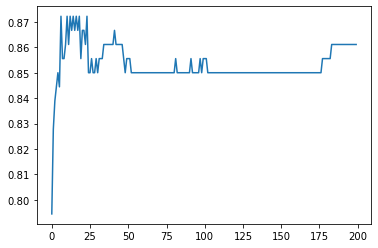

In [17]:
plt.plot(accuracyListGroup[maxP])

Therefore, the best K-NN model is when we remove Area(0), ConvexArea(4), and set the number of neighbors to 7. And the best classifier code is as below

In [18]:
# Assign values to the X and y variables:
X = dataset.iloc[:, possible_paramter_pairs[maxP]].values # Not include the last column (aka. the Label)
y = dataset.iloc[:, -1].values 
#
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=myseed) 

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=maxN)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [19]:
calModelAccuracy(y_predict, y_test)

0.8722222222222222

In [20]:
possible_paramter_pairs[maxP]

[1, 2, 3, 5, 6]

### Gaussian Naive Bayes with Parameter Tuning

In [26]:
# Import Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
# Assign values to the X and y variables:

X_Group = [dataset.iloc[:, i].values for i in possible_paramter_pairs]

y = dataset.iloc[:, -1].values 

In [29]:
GNB_Accuracy_Score_Records = []

for X in X_Group:
    # Split dataset into random train and test subsets:
    train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.33, random_state=42)

    # Initialize classifier:
    gnb = GaussianNB()

    # Train the classifier:
    model = gnb.fit(train, train_labels)
    # Make predictions with the classifier:
    predictive_labels = gnb.predict(test)

    # Evaluate label (subsets) accuracy:
    score = accuracy_score(test_labels, predictive_labels)
    print("accuracy_score: ", score)
    GNB_Accuracy_Score_Records.append(score)

accuracy_score:  0.8585858585858586
accuracy_score:  0.8552188552188552
accuracy_score:  0.8249158249158249
accuracy_score:  0.8619528619528619
accuracy_score:  0.835016835016835
accuracy_score:  0.835016835016835
accuracy_score:  0.8585858585858586


It is clear that the group that have max accuracy score is the forth group, or the parameter group that remove Area(0), ConvexArea(4). And form the result, the accuracy score of it is 0.8619528619528619

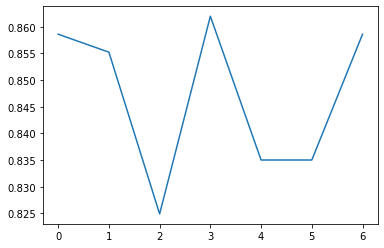

In [30]:
plt.plot(GNB_Accuracy_Score_Records)

## Future Work & Conclusion

The best combination of parameters is [1,2,3,5,6] or the corresponding feature group [“MajorAxisLength”, “MinorAxisLength”, “Eccentricity”, “Extent”, “Perimeter”], which has achieved the best accuracy in both models.

K-NN has more desirable results for the two models we have used. However, the accuracy is not very different for both, and the choice needs to be made according to the actual scenario.

There are many other classification methods that can be applied to this problem, such as clustering, SVM, etc.